In [12]:
# getting the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import random
style.use('fivethirtyeight')


#For testing learning curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#function for plotting the learning curve
#from learn_curve import plot_learning_curve

In [13]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

(1797, 64)


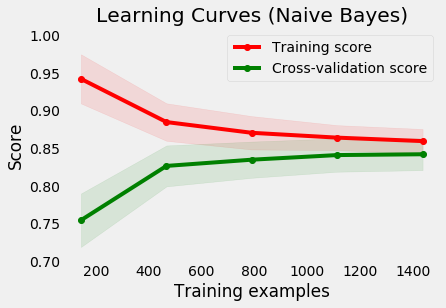

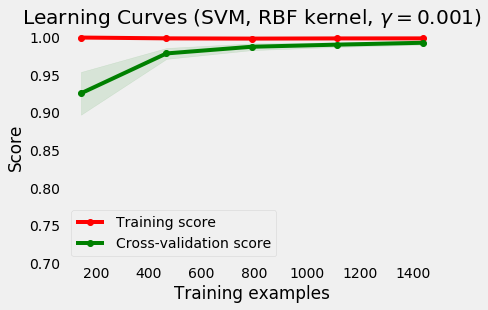

In [14]:
digits = load_digits()
X, y = digits.data, digits.target

print(X.shape)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In this notebook, we implement the algorithm from the basics. For the purpose of visualization, we will first test the model on 2-dimensional data points. Later, we employ the same model on the Iris Dataset.

In [23]:
# knn method (3 neighbors by default)
def knn(data,predict,k=3):
    
    # data is the training set 
    # predict is a single test data instance
    # k is number of nearest neighbors used for classification (user parameter)
    
    if len(data)>=k:
        warnings.warn('K is set to value less than total voting groups!')
    
    # distances stores distance and label of the training points from the test point
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    
    # sort distances in increasing order and take the label of the least k among them
    votes = [i[1] for i in sorted(distances)[:k]]
    
    # find the label which occurs the most and proportion of the its occurence
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k
    return vote_result , confidence   

In [24]:
# train set
# 3 points each in 2 classes ('k': black, 'r':red)
dataset = {'k':[[1,2],[2,3],[3,1]] , 'r':[[6,5],[7,7],[8,6]]}

# test instance
new_features = [5,7]

result = knn(dataset,new_features,3)
print(result)

('r', 1.0)


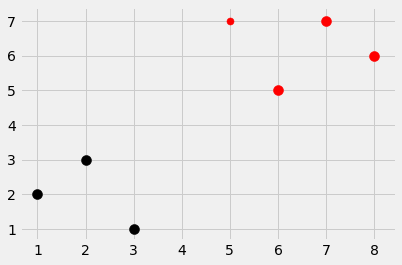

In [31]:
# plotting the points
[[plt.scatter(ii[0],ii[1],s=100,c=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s=50,c=result[0])

plt.show()

# Applying on Forest Types Dataset 

In [26]:
# importing the Forest Types Training Dataset
df_tr = pd.read_csv('../training.csv') #Dataframe for training.csv
class_tr = df_tr['class'].unique()  #classes for training.csv
df_tr.head()                        #printing dataframe for training.csv

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,1.00
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [27]:
# importing the Forest Types Testing Dataset
df_ts = pd.read_csv('../testing.csv') #Dataframe for testing.csv
class_ts = df_ts['class'].unique()  #classes for testing.csv
df_ts.head()                        #printing dataframe for testing.csv

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [28]:
# converting the dataframes to lists
train_data = df_tr.values.tolist()  #Training data coverted to list 
test_data = df_ts.values.tolist()  #Testing data coverted to list 

# shuffling the records for train and test data
random.shuffle(train_data)
random.shuffle(test_data)


# Data set comes splitted into train(62%) and test sets(38%)
train_set = {class_tr[0]:[],class_tr[1]:[],class_tr[2]:[],class_tr[3]:[]}
test_set = {class_ts[0]:[],class_ts[1]:[],class_ts[2]:[],class_ts[3]:[]}

#Filling the training and testing datasets
for i in train_data:    
    train_set[i[0]].append(i[1:])  
for i in test_data:
    test_set[i[0]].append(i[1:])
    
    


Calculating the accuracy. Also displaying the confidence in case of incorrect prediction.

<module 'matplotlib.pyplot' from 'C:\\Users\\gollo\\Miniconda3\\envs\\tarea2\\lib\\site-packages\\matplotlib\\pyplot.py'>

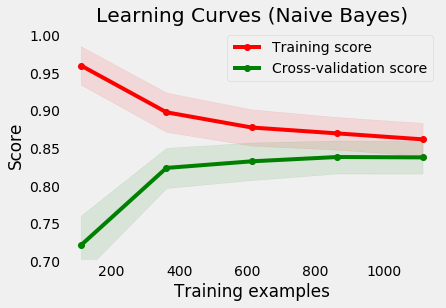

In [29]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.38, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

In [30]:
correct = 0
total = 0
print(len(test_set[group]))
for group in test_set:
    for data in test_set[group]:
        
        vote, confidence = knn(train_set,data,k=5)
        if vote==group:
            correct +=1
        #else:
            #print(confidence)
        total +=1

print('Accuracy with k=5:',correct/total)


for group in test_set:
    for data in test_set[group]:
        vote, confidence = knn(train_set,data,k=7)
        if vote==group:
            correct +=1
        #else:
            #print(confidence)
        total +=1

print('Accuracy with k=7:',correct/total)

for group in test_set:
    for data in test_set[group]:
        vote, confidence = knn(train_set,data,k=9)
        if vote==group:
            correct +=1
        #else:
            #print(confidence)
        total +=1

print('Accuracy with k=9:',correct/total)

NameError: name 'group' is not defined